In [35]:
import spaudiopy as spa
import pyfar as pf
import matplotlib.pyplot as plt
import scipy as sp
import os
import pathlib
import glob
import numpy as np
import soundfile as sf

Generelle Idee meines Ansatzes:
- HOA zu spherical Harmonics (Evtl. Weg über B-Format?)
- Spherical Harmonics zu Richtungsvektoren bzw. Gewichten
- Profit

In [36]:
# Definition von Variablen 
fs = 44100
# audio,fs = sf.read("HOA\HOA_A10p_S00_R00_CH01.wav")

# Erstellung der Multifile-IR
RIR_Mf = np.zeros((16,224910))
n = 0

for i in [f'{i:>02}' for i in range(1, 16)]:
    RIR = spa.io.load_audio("HOA\HOA_A10p_S00_R00_CH" + i + ".wav")
    RIR_Mf[n] = spa.sig.MonoSignal(RIR, fs = 48000)
    n = n+1

In [52]:
# Berechnung der Schalleinfallsrichtungen + Energien

# Definition des Lautsprechersetups
ls_setup = spa.decoder.LoudspeakerSetup([1,0,0,0,0,-1], [0,1,0,-1,0,0], [0,0,1,0,-1,0])
ls_setup.ambisonics_setup()
# ls_setup.ambisonics_hull.show()

# Decoden des Ambisonics-Signals in Einzelsignale
ls_sig = spa.decoder.allrad(RIR_Mf, ls_setup, 3)

# Test, Extrahierung der Einzelsignale
# Definition der Evaluationszeiträume
tl = 15
tu = 100

tl = round((tl*(10**(-3)))*fs)
tu = round((tu*(10**(-3)))*fs)

front = sum(ls_sig[0, tl:tu])
back = sum(ls_sig[5, tl:tu])
top = sum(ls_sig[2, tl:tu])
left = sum(ls_sig[1, tl:tu])
right = sum(ls_sig[3, tl:tu])


# top = spa.parsa.sh_beamform()



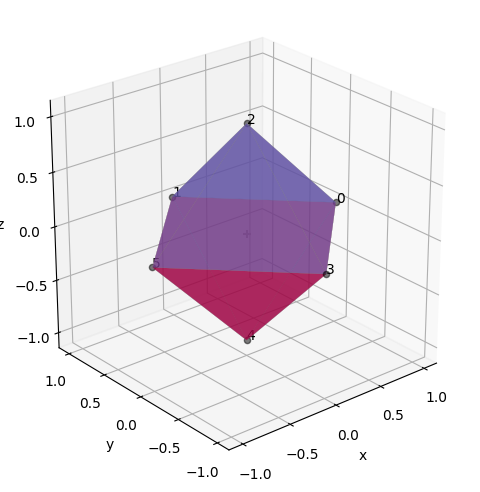

In [19]:
# Plot der LS-Hülle (experimentell und nicht ganz das, was das Ziel ist)
spa.plot.hull(ls_setup)

In [53]:
# Beschreibung des Parameters

# TS - Top/Sides(left,right)

TS = 10*np.log10((top)**2/(left + right)**2)

# TH - Top/Hull(left,right,back)

TH = 10*np.log10((top)**2/(left + right + back)**2)


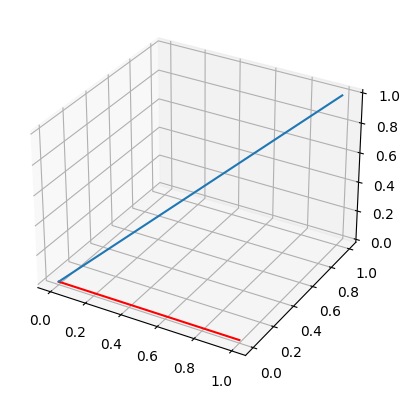

In [56]:

# Darstellung des Parameters

# Vorläufiger Plot der reinen IR
# spa.plot.sh_rms_map(RIR_Mf, title="Raw Spatial Impulse Response (with SH)")

ax = plt.axes(projection='3d')
ax.plot3D([0,1],[0,0],[0,0],'red')
ax.plot3D([0,1],[0,1],[0,1])